# Project Roadmap / Responsibility Breakdown


> ✅ Find/Propose Research Papers
  - [OWNER: **AnnaGarcia**]
      - ✅ An Information Retrieval Approach to Building
Datasets for Hate Speech Detection
      - 🪓 A Large Scale Search Dataset for Unbiased Learning to Rank
      - 🪓 NATURAL LANGUAGE DESCRIPTIONS OF
DEEP VISUAL FEATURES
      - 🪓 Dataset Distillation via Factorization
      - 🪓 A Combinatorial Perspective on Transfer Learning
  - [OWNER: **BrianLlinas**]

-------
Shared Folder: https://drive.google.com/drive/folders/1wamYeVVBSp4Zqc20EG-JqlR3ZY78Umc6?usp=sharing

> ✅ Create Presentation
  - ✅ [OWNER: **AnnaGarcia**] Slides 1-8, 13, 14
  - ✅ [OWNER: **BrianLlinas**] Slides 9-12

-----

> ✅ [Collecting Dataset](https://colab.research.google.com/drive/1Nv6I69-I8_Kg1LQQYTLjhETD-wsuL71f#scrollTo=IXUbg8pSm8MZ&line=1&uniqifier=1) [OWNER: **AnnaGarcia**]
  - Data from:
    1. https://www.kaggle.com/datasets/vkrahul/twitter-hate-speech/data
    2.  https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data
  - ✅ Collect tweets
       - 3,000 is for training and testing models
       - 1,000 is for 'building the dataset' Experiment
  - ✅ Clean the data
  - ✅ Export both dataset into a csv file. provide names here:
    - experiment_dataset.csv
    - train_test_dataset.csv
    * They are in our shared drive: `/content/drive/MyDrive/CS722-Project-Shared`

-----

> - ✅ Create 1st Algorithm (Pooling) [OWNER: **AnnaGarcia**]
    - ☑ Logistic Regression
    - ☑ Naive bayes
    - ☑ SVC
    - ☑ linear SVC
    - ☑ gradient Boosting
    - ☑ Get the Threshold = Max of AUC
    - ☑ Pooling and Dump the rest of the data that are below the threshold


Notes: I created the models and train them and produces probabilty on each of them


> - [ ] Create 2nd Algorithm (ActiveLearning) [OWNER: AnnaGarcia & BrianLlinas]
    - [ ] Start with Logistic Regression
    - [ ] Convert Tweets TFIDF features
    - [ ] Covert Tweets into embeddings using BERT
    - [ ] Create two models: SAL and CAL active learning
    - [ ] Run the TFIDF and BERT data in SAL and CAL (Active vs Passive learning)

-----

> - [ ] Evaluation [OWNER: **OWNERNAME**]
    - [ ] Create out own 'hate word' list from the first dataset
    -

----

> - [ ] Extra Credit Experiment [OWNER: **OWNERNAME**]
> - [ ] Evaluation [OWNER: **OWNERNAME**]

------

> - [ ] Final Presentation

--------------------

 > - [ ] Research Paper (10 pages)

In [1]:
# @title Imports

import os
import re
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Imports

import os
import re
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf

## Training Models

In [94]:
training_data_path = "/content/drive/MyDrive/CS722-Project-Shared/train_test_datasetV2.csv"
data = pd.read_csv(training_data_path)

In [95]:
# @title Check for NA values
na_values = data.isna()
value_counts = na_values.apply(pd.Series.value_counts)
value_counts

,ID,tweet,clean_tweet,target
False,6008,6008,6008,6008


In [96]:
seed = 220
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
number_of_epochs = 10
# Step 1: Vectorize the Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                             binary=True,
                             smooth_idf=False)
X = tfidf_vectorizer.fit_transform(data['clean_tweet'])
y = data['target']

In [97]:
def train_and_save_model(x, y, model_name, save_path):
  # Step 2: Split the Data (Optional) - we can just use the entire X values
  # since we won't be testing
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  model = None

  if model_name == "naive_bayes":
    model = MultinomialNB()
  elif model_name == "logistic_regression":
    model = LogisticRegression()
  elif model_name == "gradient_boosting":
    model = GradientBoostingClassifier(random_state=seed)
  elif model_name == 'svc':
    model = SVC(probability= True, C=0.01, kernel="rbf")
  elif model_name == "linear_svc":
    svm = LinearSVC(C=0.01)
    model = CalibratedClassifierCV(svm)

  # Step 3: Train the Model
  model.fit(X_train, y_train)

  # Step 3.1 Save the trained model
  with open(save_path, 'wb') as model_file:
        pickle.dump(model, model_file)
  print(f"Expoted model to: {save_path}")
  return model, X_test, y_test

In [98]:
save_path = "/content/drive/MyDrive/CS722-Project-Shared/trained_models/"

logistic_regression_model, x_test, y_test = train_and_save_model(X, y, "logistic_regression", save_path + "logistic_regression.pkl" )
naive_bayes_model, x_test, y_test = train_and_save_model(X, y, "naive_bayes", save_path + "naive_bayes.pkl")
gradient_boosting_model, x_test, y_test = train_and_save_model(X, y, "gradient_boosting", save_path + "gradient_boosting.pkl")
svc_model, x_test, y_test = train_and_save_model(X, y, "svc", save_path + "svc.pkl")
linear_svc_model, x_test, y_test = train_and_save_model(X, y, "linear_svc", save_path + "linear_svc.pkl")

Expoted CSV model to: /content/drive/MyDrive/CS722-Project-Shared/trained_models/logistic_regression.pkl
Expoted CSV model to: /content/drive/MyDrive/CS722-Project-Shared/trained_models/naive_bayes.pkl
Expoted CSV model to: /content/drive/MyDrive/CS722-Project-Shared/trained_models/gradient_boosting.pkl
Expoted CSV model to: /content/drive/MyDrive/CS722-Project-Shared/trained_models/svc.pkl
Expoted CSV model to: /content/drive/MyDrive/CS722-Project-Shared/trained_models/linear_svc.pkl


## Experiment with the Models using Pooling algorithm

In [99]:
experiment_data_path = "/content/drive/MyDrive/CS722-Project-Shared/experiment_datasetV2.csv"
experiment_data = pd.read_csv(experiment_data_path)

In [100]:
experiment_data.head(2)

,ID,tweet,clean_tweet,target
0,5119,Come on man RT @BasedLaRock: Oreo needs to chi...,come man oreo needs chill know good nah tco...,0
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1


In [101]:
# @title Check for NA values
na_values = data.isna()
value_counts = na_values.apply(pd.Series.value_counts)
value_counts

,ID,tweet,clean_tweet,target
False,6008,6008,6008,6008


In [102]:
# Turn 'clean_tweet' into string type
experiment_data['clean_tweet'] = experiment_data['clean_tweet'].apply(str)

## Initiate pooling algorithm

> The following will run every single algorithm. A separate function will be created to run the entire 5 models

### LOGISTIC REGRESSION

In [103]:
logistic_regression_df = experiment_data

In [104]:
new_data_features = tfidf_vectorizer.transform(logistic_regression_df['clean_tweet'])
new_predictions = logistic_regression_model.predict(new_data_features)

# Get class probabilities for the new predictions
new_class_probabilities = logistic_regression_model.predict_proba(new_data_features)

# Add new columns to the original DataFrame for predictions and probabilities
logistic_regression_df['y_hat'] = new_predictions
logistic_regression_df['y_hat_probability'] = [max(prob) for prob in new_class_probabilities]

len(logistic_regression_df)

1000

In [105]:
fpr, tpr, thresholds=metrics.roc_curve(logistic_regression_df['target'],logistic_regression_df['y_hat_probability'])
auc_rl=metrics.auc(fpr,tpr)
print(f"auc_rl: {auc_rl}")
print(f"TPR: {list(tpr)}")
print(f"FPR: {list(fpr)}")
print(f"thresholds: {list(thresholds)}")

auc_rl: 0.385757532998961
TPR: [0.0, 0.00804289544235925, 0.00804289544235925, 0.0160857908847185, 0.0160857908847185, 0.024128686327077747, 0.03485254691689008, 0.03485254691689008, 0.03753351206434316, 0.03753351206434316, 0.045576407506702415, 0.045576407506702415, 0.04825737265415549, 0.04825737265415549, 0.05093833780160858, 0.05093833780160858, 0.05361930294906166, 0.05361930294906166, 0.05630026809651475, 0.05630026809651475, 0.06166219839142091, 0.06166219839142091, 0.06702412868632708, 0.06702412868632708, 0.06970509383378017, 0.09115281501340483, 0.09115281501340483, 0.09651474530831099, 0.09651474530831099, 0.09919571045576407, 0.09919571045576407, 0.09919571045576407, 0.09919571045576407, 0.10187667560321716, 0.10187667560321716, 0.10187667560321716, 0.10187667560321716, 0.10455764075067024, 0.10455764075067024, 0.10723860589812333, 0.10723860589812333, 0.1126005361930295, 0.1126005361930295, 0.11528150134048257, 0.11528150134048257, 0.11796246648793565, 0.11796246648793565

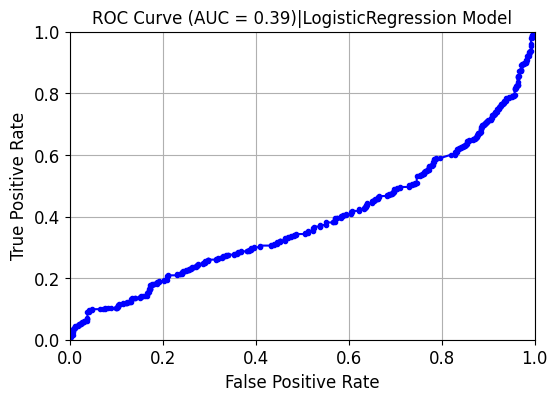

In [106]:
plt.figure(figsize=(6, 4))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, linestyle='-', color='b', marker='o', markersize=3)
plt.grid(True)
plt.title('ROC Curve (AUC = {:.2f})|LogisticRegression Model'.format(auc_rl))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

In [ ]:
# Create a DataFrame to store thresholds and their Youden's statistic
df_thresholds = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_thresholds

In [108]:
# Find the threshold that maximizes Youden's J statistic
# df_thresholds.sort_values('Youden',ascending=False).head(1)
optimal_threshold_row = df_thresholds[df_thresholds['Youden'] == df_thresholds['Youden'].max()]
optimal_threshold_row

,tpr,fpr,thresholds,Youden
27,0.096515,0.041467,0.912604,0.055047


In [109]:
# Get the optimal threshold value
optimal_threshold = optimal_threshold_row['thresholds'].values[0]
optimal_threshold

0.9126040168663008

In [111]:
# Filter rows based on the optimal threshold
filtered_df = logistic_regression_df[logistic_regression_df['y_hat_probability'] >= optimal_threshold]

# Print the filtered DataFrame
print(f"Filtered DataFrame Length: {len(filtered_df)}")
filtered_df.head(5)

Filtered DataFrame Length: 62


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
11,3096,Elizabeth is a.stupid hoe.,elizabeth astupid hoe,1,1,0.947498
12,3359,@Real_Liam_Payne be a pussy http://t.co/ttzsxB...,pussy tcottzsxbts74,1,1,0.960211
16,1484,you might be a libtard if... #libtard #sjw #l...,libtard,1,1,0.917293
20,6761,"Twitters little blue birds name is Larry, afte...",twitters little blue birds larry celtics isu l...,0,0,0.926384
30,6804,What the monkey... http://t.co/h76rptL8Wq,monkey tcoh76rptl8wq,0,0,0.931343


In [112]:
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/logistic_regression_pooling.csv", index=False)
print("Successfully exported CSV")

Successfully exported CSV


### NAIVE BAYES

In [149]:
naive_bayes_df = experiment_data # <---

In [150]:
new_data_features = tfidf_vectorizer.transform(naive_bayes_df['clean_tweet']) # <---
new_predictions = naive_bayes_model.predict(new_data_features) # <---

# Get class probabilities for the new predictions
new_class_probabilities = naive_bayes_model.predict_proba(new_data_features) # <---

# Add new columns to the original DataFrame for predictions and probabilities
naive_bayes_df['y_hat'] = new_predictions  # <---
naive_bayes_df['y_hat_probability'] = [max(prob) for prob in new_class_probabilities] # <---

len(naive_bayes_df)

1000

In [151]:
fpr, tpr, thresholds=metrics.roc_curve(naive_bayes_df['target'],naive_bayes_df['y_hat_probability']) # <---

auc_rl=metrics.auc(fpr,tpr)

print(f"auc_rl: {auc_rl}")
print(f"TPR: {list(tpr)}")
print(f"FPR: {list(fpr)}")
print(f"thresholds: {list(thresholds)}")

auc_rl: 0.22649452048351443
TPR: [0.0, 0.0, 0.002680965147453083, 0.00804289544235925, 0.00804289544235925, 0.00804289544235925, 0.010723860589812333, 0.010723860589812333, 0.010723860589812333, 0.032171581769437, 0.032171581769437, 0.03485254691689008, 0.03485254691689008, 0.03753351206434316, 0.03753351206434316, 0.045576407506702415, 0.045576407506702415, 0.045576407506702415, 0.045576407506702415, 0.04825737265415549, 0.04825737265415549, 0.05361930294906166, 0.05361930294906166, 0.05630026809651475, 0.05630026809651475, 0.05630026809651475, 0.05630026809651475, 0.058981233243967826, 0.058981233243967826, 0.06166219839142091, 0.06166219839142091, 0.064343163538874, 0.064343163538874, 0.06702412868632708, 0.06702412868632708, 0.06970509383378017, 0.06970509383378017, 0.08042895442359249, 0.08042895442359249, 0.08310991957104558, 0.08310991957104558, 0.08579088471849866, 0.08579088471849866, 0.08579088471849866, 0.08847184986595175, 0.08847184986595175, 0.09115281501340483, 0.0911528

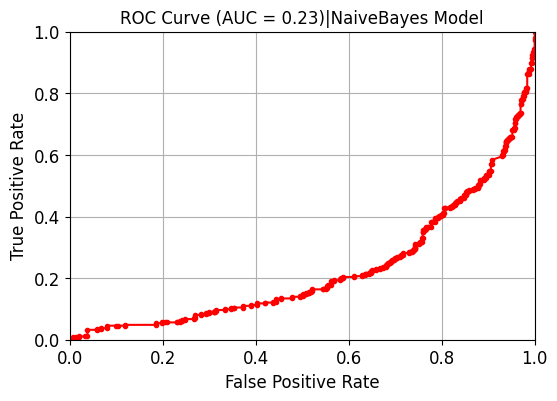

In [152]:
plt.figure(figsize=(6, 4))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, linestyle='-', color='r', marker='o', markersize=3)
plt.grid(True)
plt.title('ROC Curve (AUC = {:.2f})|NaiveBayes Model'.format(auc_rl))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

In [153]:
# Create a DataFrame to store thresholds and their Youden's statistic
df_thresholds = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_thresholds

,tpr,fpr,thresholds,Youden
0,0.000000,0.000000,1.997549,0.000000
1,0.000000,0.006380,0.997549,-0.006380
2,0.002681,0.006380,0.991495,-0.003699
3,0.008043,0.006380,0.988854,0.001663
4,0.008043,0.012759,0.985132,-0.004716
...,...,...,...,...
333,0.943700,0.998405,0.513575,-0.054705
334,0.943700,1.000000,0.513481,-0.056300
335,0.973190,1.000000,0.505908,-0.026810
336,0.978552,1.000000,0.505740,-0.021448


In [154]:
# Find the threshold that maximizes Youden's J statistic
#  df_thresholds.sort_values('Youden',ascending=False).head(1)
optimal_threshold_row = df_thresholds[df_thresholds['Youden'] == df_thresholds['Youden'].max()]
optimal_threshold_row

,tpr,fpr,thresholds,Youden
3,0.008043,0.00638,0.988854,0.001663


In [155]:
# Get the optimal threshold value
optimal_threshold = optimal_threshold_row['thresholds'].values[0]  # <-- We will take the second value because the threshold is more than 1
optimal_threshold

0.9888543820117094

In [156]:
# Filter rows based on the optimal threshold
filtered_df = naive_bayes_df[naive_bayes_df['y_hat_probability'] >= optimal_threshold] # <---

# Print the filtered DataFrame
print(f"Filtered DataFrame Length: {len(filtered_df)}")
filtered_df.head(5)

Filtered DataFrame Length: 7


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
179,1759,are you #black &amp; feel like â¦ are stompin...,feel like stomping listen,1,1,0.991495
416,4332,&#9733; BEST ASIAN MASSAGE ON THE park slope -...,best asian massage park slope rated spa 718622...,0,0,0.997549
543,4341,&#9733; BEST ASIAN MASSAGE ON THE park slope -...,best asian massage park slope rated spa 718622...,0,0,0.997549
574,2183,"#sikh #temple vandalised in in #calgary, #wso ...",vandalised condemns act,1,1,0.988854
769,4336,&#9733; BEST ASIAN MASSAGE ON THE park slope -...,best asian massage park slope rated spa 718622...,0,0,0.997549


In [157]:
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/naive_bayes_pooling.csv", index=False)
print("Successfully exported CSV")

Successfully exported CSV


### GRADIENT BOOSTING

In [164]:
gradient_boosting_df = experiment_data # <---

In [165]:
new_data_features = tfidf_vectorizer.transform(gradient_boosting_df['clean_tweet']) # <---
new_predictions = gradient_boosting_model.predict(new_data_features) # <---

# Get class probabilities for the new predictions
new_class_probabilities = gradient_boosting_model.predict_proba(new_data_features) # <---

# Add new columns to the original DataFrame for predictions and probabilities
gradient_boosting_df['y_hat'] = new_predictions  # <---
gradient_boosting_df['y_hat_probability'] = [max(prob) for prob in new_class_probabilities] # <---

len(gradient_boosting_df)

1000

In [166]:
fpr, tpr, thresholds=metrics.roc_curve(gradient_boosting_df['target'],gradient_boosting_df['y_hat_probability']) # <---

auc_rl=metrics.auc(fpr,tpr)

print(f"auc_rl: {auc_rl}")
print(f"TPR: {list(tpr)}")
print(f"FPR: {list(fpr)}")
print(f"thresholds: {list(thresholds)}")

auc_rl: 0.4905845530228202
TPR: [0.0, 0.002680965147453083, 0.0160857908847185, 0.02680965147453083, 0.03753351206434316, 0.045576407506702415, 0.05093833780160858, 0.05361930294906166, 0.064343163538874, 0.064343163538874, 0.07238605898123325, 0.07238605898123325, 0.08042895442359249, 0.08042895442359249, 0.08579088471849866, 0.2064343163538874, 0.21179624664879357, 0.21179624664879357, 0.21179624664879357, 0.21179624664879357, 0.21715817694369974, 0.2225201072386059, 0.2225201072386059, 0.225201072386059, 0.23056300268096513, 0.23056300268096513, 0.23324396782841822, 0.23324396782841822, 0.24128686327077747, 0.24128686327077747, 0.24664879356568364, 0.24664879356568364, 0.24932975871313673, 0.24932975871313673, 0.2520107238605898, 0.2520107238605898, 0.26005361930294907, 0.26005361930294907, 0.26273458445040215, 0.26541554959785524, 0.26541554959785524, 0.26541554959785524, 0.26541554959785524, 0.30563002680965146, 0.3109919571045576, 0.3109919571045576, 0.3109919571045576, 0.3136729

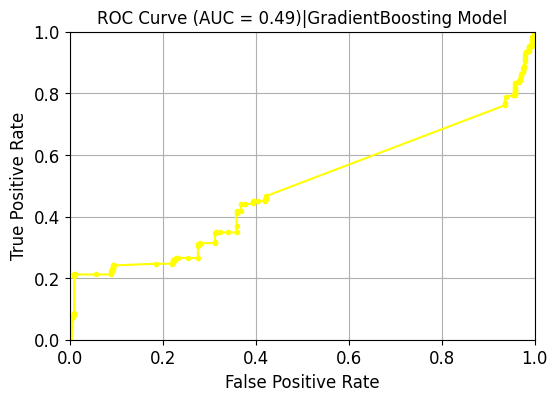

In [167]:
plt.figure(figsize=(6, 4))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, linestyle='-', color='yellow', marker='o', markersize=3)
plt.grid(True)
plt.title('ROC Curve (AUC = {:.2f})|GradientBoosting Model'.format(auc_rl))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

In [168]:
# Create a DataFrame to store thresholds and their Youden's statistic
df_thresholds = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_thresholds

,tpr,fpr,thresholds,Youden
0,0.000000,0.000000,1.991335,0.000000
1,0.002681,0.000000,0.991335,0.002681
2,0.016086,0.000000,0.956589,0.016086
3,0.026810,0.000000,0.953085,0.026810
4,0.037534,0.000000,0.950278,0.037534
...,...,...,...,...
113,0.973190,0.995215,0.538004,-0.022025
114,0.983914,0.995215,0.533721,-0.011301
115,0.994638,0.998405,0.530018,-0.003767
116,1.000000,0.998405,0.523587,0.001595


In [169]:
# Find the threshold that maximizes Youden's J statistic
#  df_thresholds.sort_values('Youden',ascending=False).head(1)
optimal_threshold_row = df_thresholds[df_thresholds['Youden'] == df_thresholds['Youden'].max()]
optimal_threshold_row

,tpr,fpr,thresholds,Youden
16,0.211796,0.009569,0.903506,0.202227


In [170]:
# Get the optimal threshold value
optimal_threshold = optimal_threshold_row['thresholds'].values[0]  # <-- We will take the second value because the threshold is more than 1
optimal_threshold

0.9035055984947704

In [171]:
# Filter rows based on the optimal threshold
filtered_df = gradient_boosting_df[gradient_boosting_df['y_hat_probability'] >= optimal_threshold] # <---

# Print the filtered DataFrame
print(f"Filtered DataFrame Length: {len(filtered_df)}")
filtered_df.head(5)

Filtered DataFrame Length: 85


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
9,1730,"libtard- ""i can't believe she hate muslims and...",libtard cant believe hate muslims suppo trump ...,1,1,0.908923
17,4087,bahaha karma is a bitch,bahaha karma bitch,1,1,0.911735
18,3455,Bad bitch on my line tryna give me brains,bad bitch line tryna brains,1,1,0.911735
20,6761,"Twitters little blue birds name is Larry, afte...",twitters little blue birds larry celtics isu l...,0,0,0.929174
29,3979,Side hoes need rounds too... RT @Peachpapayya:...,hoes need rounds play stupid hoe song,1,1,0.934715


In [172]:
name = "gradient_boosting_pooling.csv"
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/" + name, index=False)
print("Successfully exported CSV")

Successfully exported CSV


### SVC

In [173]:
svc_df = experiment_data # <---

In [174]:
new_data_features = tfidf_vectorizer.transform(svc_df['clean_tweet']) # <---
new_predictions = svc_model.predict(new_data_features) # <---

# Get class probabilities for the new predictions
new_class_probabilities = svc_model.predict_proba(new_data_features) # <---

# Add new columns to the original DataFrame for predictions and probabilities
svc_df['y_hat'] = new_predictions  # <---
svc_df['y_hat_probability'] = [max(prob) for prob in new_class_probabilities] # <---

len(svc_df)

1000

In [175]:
fpr, tpr, thresholds=metrics.roc_curve(svc_df['target'],svc_df['y_hat_probability']) # <---

auc_rl=metrics.auc(fpr,tpr)

print(f"auc_rl: {auc_rl}")
print(f"TPR: {list(tpr)}")
print(f"FPR: {list(fpr)}")
print(f"thresholds: {list(thresholds)}")

auc_rl: 0.6963197660248599
TPR: [0.0, 0.29222520107238603, 0.35656836461126007, 0.3646112600536193, 0.3806970509383378, 0.3806970509383378, 0.38337801608579086, 0.38337801608579086, 0.4101876675603217, 0.4101876675603217, 0.4262734584450402, 0.4262734584450402, 0.4691689008042895, 0.4691689008042895, 0.5040214477211796, 0.5040214477211796, 0.5254691689008043, 0.5254691689008043, 0.5308310991957105, 0.5308310991957105, 0.5335120643431636, 0.5335120643431636, 0.5495978552278821, 0.5495978552278821, 0.5576407506702413, 0.5576407506702413, 0.5656836461126006, 0.5656836461126006, 0.5656836461126006, 0.5656836461126006, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5710455764075067, 0.5710455764075067, 0.5737265415549598, 0.5737265415549598, 0.5764075067024129, 0.5764075067024129, 0.579088471849866, 0.579088471849866, 0.5817694369973191, 0.5817694369973191, 0.5871313672922251, 

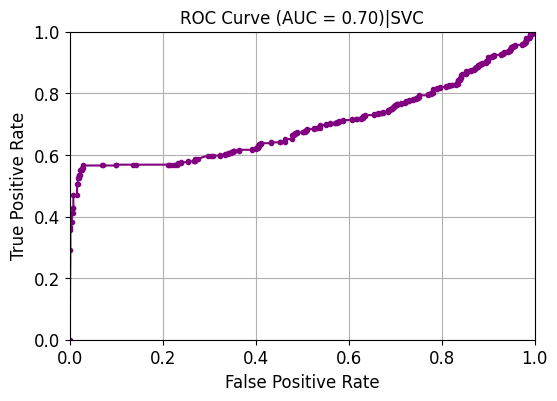

In [176]:
plt.figure(figsize=(6, 4))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, linestyle='-', color='purple', marker='o', markersize=3)
plt.grid(True)
plt.title('ROC Curve (AUC = {:.2f})|SVC'.format(auc_rl))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

In [177]:
# Create a DataFrame to store thresholds and their Youden's statistic
df_thresholds = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_thresholds

,tpr,fpr,thresholds,Youden
0,0.000000,0.000000,2.000000,0.000000
1,0.292225,0.001595,1.000000,0.290630
2,0.356568,0.001595,1.000000,0.354973
3,0.364611,0.001595,1.000000,0.363016
4,0.380697,0.001595,1.000000,0.379102
...,...,...,...,...
264,0.991957,0.995215,0.511154,-0.003258
265,0.994638,0.995215,0.509858,-0.000577
266,0.994638,0.996810,0.508045,-0.002172
267,0.997319,0.996810,0.506198,0.000509


In [178]:
# Find the threshold that maximizes Youden's J statistic
#  df_thresholds.sort_values('Youden',ascending=False).head(1)
optimal_threshold_row = df_thresholds[df_thresholds['Youden'] == df_thresholds['Youden'].max()]
optimal_threshold_row

,tpr,fpr,thresholds,Youden
26,0.565684,0.028708,0.999982,0.536976


In [179]:
# Get the optimal threshold value
optimal_threshold = optimal_threshold_row['thresholds'].values[0]  # <-- We will take the second value because the threshold is more than 1
optimal_threshold

0.9999821023965579

In [180]:
# Filter rows based on the optimal threshold
filtered_df = svc_df[svc_df['y_hat_probability'] >= optimal_threshold] # <---

# Print the filtered DataFrame
print(f"Filtered DataFrame Length: {len(filtered_df)}")
filtered_df.head(5)

Filtered DataFrame Length: 229


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1,0,1.000000
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1,0,1.000000
8,2706,here's how to combat violent extremism in 2017...,heres combat violent extremism 2017 white nati...,1,0,0.999991
9,1730,"libtard- ""i can't believe she hate muslims and...",libtard cant believe hate muslims suppo trump ...,1,0,1.000000
11,3096,Elizabeth is a.stupid hoe.,elizabeth astupid hoe,1,0,1.000000


In [181]:
name = "svc_pooling.csv"
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/" + name, index=False)
print(f"Successfully exported {name}")

Successfully exported svc_pooling.csv


### Linear SVC

In [182]:
linear_svc_df = experiment_data # <---

In [ ]:
new_data_features = tfidf_vectorizer.transform(linear_svc_df['clean_tweet']) # <---
new_predictions = linear_svc_model.predict(new_data_features) # <---

# Get class probabilities for the new predictions
new_class_probabilities = linear_svc_model.predict_proba(new_data_features) # <---

# Add new columns to the original DataFrame for predictions and probabilities
linear_svc_df['y_hat'] = new_predictions  # <---
linear_svc_df['y_hat_probability'] = [max(prob) for prob in new_class_probabilities] # <---

len(linear_svc_df)

1000

In [183]:
fpr, tpr, thresholds=metrics.roc_curve(linear_svc_df['target'],linear_svc_df['y_hat_probability']) # <---

auc_rl=metrics.auc(fpr,tpr)

print(f"auc_rl: {auc_rl}")
print(f"TPR: {list(tpr)}")
print(f"FPR: {list(fpr)}")
print(f"thresholds: {list(thresholds)}")

auc_rl: 0.6963197660248599
TPR: [0.0, 0.29222520107238603, 0.35656836461126007, 0.3646112600536193, 0.3806970509383378, 0.3806970509383378, 0.38337801608579086, 0.38337801608579086, 0.4101876675603217, 0.4101876675603217, 0.4262734584450402, 0.4262734584450402, 0.4691689008042895, 0.4691689008042895, 0.5040214477211796, 0.5040214477211796, 0.5254691689008043, 0.5254691689008043, 0.5308310991957105, 0.5308310991957105, 0.5335120643431636, 0.5335120643431636, 0.5495978552278821, 0.5495978552278821, 0.5576407506702413, 0.5576407506702413, 0.5656836461126006, 0.5656836461126006, 0.5656836461126006, 0.5656836461126006, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5683646112600537, 0.5710455764075067, 0.5710455764075067, 0.5737265415549598, 0.5737265415549598, 0.5764075067024129, 0.5764075067024129, 0.579088471849866, 0.579088471849866, 0.5817694369973191, 0.5817694369973191, 0.5871313672922251, 

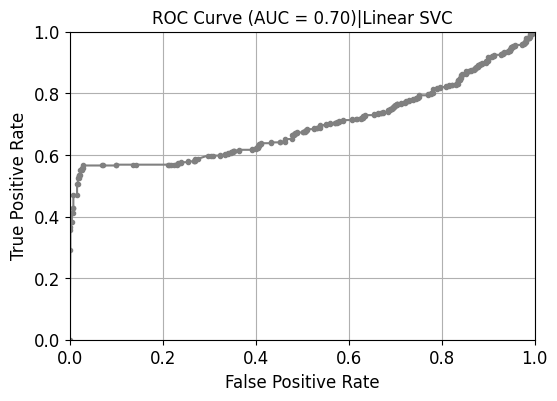

In [184]:
plt.figure(figsize=(6, 4))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, linestyle='-', color='grey', marker='o', markersize=3)
plt.grid(True)
plt.title('ROC Curve (AUC = {:.2f})|Linear SVC'.format(auc_rl))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

In [185]:
# Create a DataFrame to store thresholds and their Youden's statistic
df_thresholds = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_thresholds

,tpr,fpr,thresholds,Youden
0,0.000000,0.000000,2.000000,0.000000
1,0.292225,0.001595,1.000000,0.290630
2,0.356568,0.001595,1.000000,0.354973
3,0.364611,0.001595,1.000000,0.363016
4,0.380697,0.001595,1.000000,0.379102
...,...,...,...,...
264,0.991957,0.995215,0.511154,-0.003258
265,0.994638,0.995215,0.509858,-0.000577
266,0.994638,0.996810,0.508045,-0.002172
267,0.997319,0.996810,0.506198,0.000509


In [186]:
# Find the threshold that maximizes Youden's J statistic
#  df_thresholds.sort_values('Youden',ascending=False).head(1)
optimal_threshold_row = df_thresholds[df_thresholds['Youden'] == df_thresholds['Youden'].max()]
optimal_threshold_row

,tpr,fpr,thresholds,Youden
26,0.565684,0.028708,0.999982,0.536976


In [187]:
# Get the optimal threshold value
optimal_threshold = optimal_threshold_row['thresholds'].values[0]  # <-- We will take the second value because the threshold is more than 1
optimal_threshold

0.9999821023965579

In [188]:
# Filter rows based on the optimal threshold
filtered_df = svc_df[svc_df['y_hat_probability'] >= optimal_threshold] # <---

# Print the filtered DataFrame
print(f"Filtered DataFrame Length: {len(filtered_df)}")
filtered_df.head(5)

Filtered DataFrame Length: 229


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1,0,1.000000
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1,0,1.000000
8,2706,here's how to combat violent extremism in 2017...,heres combat violent extremism 2017 white nati...,1,0,0.999991
9,1730,"libtard- ""i can't believe she hate muslims and...",libtard cant believe hate muslims suppo trump ...,1,0,1.000000
11,3096,Elizabeth is a.stupid hoe.,elizabeth astupid hoe,1,0,1.000000


In [189]:
name = "linear_svc_pooling.csv"
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/" + name, index=False)
print(f"Successfully exported {name}")

Successfully exported linear_svc_pooling.csv


# COMBINED to GET POOLING DATASET

In [190]:
lr_pooling_df = pd.read_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/logistic_regression_pooling.csv")
nb_pooling_df = pd.read_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/naive_bayes_pooling.csv")
gb_pooling_df = pd.read_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/gradient_boosting_pooling.csv")
svc_pooling_df = pd.read_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/svc_pooling.csv")
lsvc_pooling_result = pd.read_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/linear_svc_pooling.csv")

In [191]:
# combine all dataframes
dfs = [lr_pooling_df, nb_pooling_df, gb_pooling_df, svc_pooling_df, lsvc_pooling_result]

pooling_dataset = pd.DataFrame()

for df in dfs:
    pooling_dataset = pooling_dataset.append(df, ignore_index=True)

pooling_dataset.head()

<ipython-input-191-81ac008dbdf7>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pooling_dataset = pooling_dataset.append(df, ignore_index=True)


,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
0,3096,Elizabeth is a.stupid hoe.,elizabeth astupid hoe,1,1,0.947498
1,3359,@Real_Liam_Payne be a pussy http://t.co/ttzsxB...,pussy tcottzsxbts74,1,1,0.960211
2,1484,you might be a libtard if... #libtard #sjw #l...,libtard,1,1,0.917293
3,6761,"Twitters little blue birds name is Larry, afte...",twitters little blue birds larry celtics isu l...,0,0,0.926384
4,6804,What the monkey... http://t.co/h76rptL8Wq,monkey tcoh76rptl8wq,0,0,0.931343


In [192]:
len(pooling_dataset)

612

In [193]:
# Check for duplicates in the 'ID' column and count them
duplicate_count = pooling_dataset['ID'].duplicated().sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 359


In [194]:
# Remove duplicates from the 'ID' column and update the DataFrame
pooling_dataset = pooling_dataset.drop_duplicates(subset='ID', keep='first')
len(pooling_dataset)

253

In [195]:
pooling_dataset.head()

,ID,tweet,clean_tweet,target,y_hat,y_hat_probability
0,3096,Elizabeth is a.stupid hoe.,elizabeth astupid hoe,1,1,0.947498
1,3359,@Real_Liam_Payne be a pussy http://t.co/ttzsxB...,pussy tcottzsxbts74,1,1,0.960211
2,1484,you might be a libtard if... #libtard #sjw #l...,libtard,1,1,0.917293
3,6761,"Twitters little blue birds name is Larry, afte...",twitters little blue birds larry celtics isu l...,0,0,0.926384
4,6804,What the monkey... http://t.co/h76rptL8Wq,monkey tcoh76rptl8wq,0,0,0.931343


In [196]:
name = "pooling_dataset.csv"
filtered_df.to_csv("/content/drive/MyDrive/CS722-Project-Shared/pooling_results/" + name, index=False)
print(f"Successfully exported {name}")

Successfully exported pooling_dataset.csv


# Saving the TFIDF Vectorizer

In [197]:
path = "/content/drive/MyDrive/CS722-Project-Shared/trained_models/trained_tfidf_vectorizer.pkl"
with open(path, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)